# <center>Assignment 1- Mid Week</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6020     | Prof. Chinthaka Pathum Dinesh Herath Gedara  | Abhilash Dikshit| 002702209       |Jan 13, 2024|Winter |



In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [10]:
import pandas as pd

# Convert the Iris dataset to a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df['Species'] = iris.target_names[iris.target]

# Display the first few rows of the DataFrame
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Display information about the dataset, including column names and data types
print("\nInformation about the Iris dataset:")
print(iris_df.info())

First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Information about the Iris dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [5]:
# Fit the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy for each type of iris
class_accuracy = classification_report(y_test, y_pred)

# Print results
print(f"Overall Accuracy: {overall_accuracy}")
print("\nAccuracy for Each Type of Iris:\n", class_accuracy)


Overall Accuracy: 1.0

Accuracy for Each Type of Iris:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion Matrix

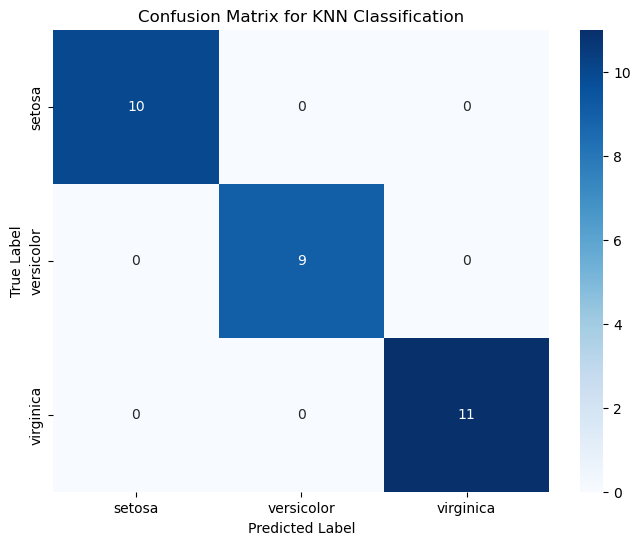

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for KNN Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Elbow Method for Choosing Reasonable K Values

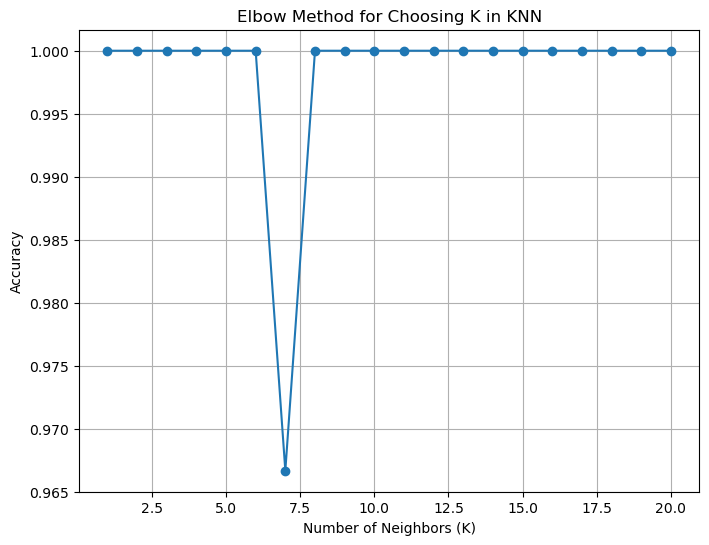

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array to store accuracy values for different K values
k_values = np.arange(1, 21)
accuracy_scores = []

# Iterate through different K values
for k in k_values:
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training set
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Method for Choosing K in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


**Conclusion:**

**Perfect Accuracy:**

The model achieved perfect accuracy (1.0) on the test set, correctly classifying all instances. This is a strong indication that the KNN model performed exceptionally well on the Iris dataset.

**Class-Specific Performance:**

For each type of Iris (classes 0, 1, and 2), precision, recall, and F1-score are all reported as 1.0. This means that the model achieved perfect precision and recall for each class.

**Imbalanced Classes:**

The support values indicate that each class has a reasonable number of instances in the test set, and there is no apparent class imbalance.

**Macro and Weighted Averages:**

The macro average and weighted average for precision, recall, and F1-score are all reported as 1.0. This suggests that the model's performance is consistently high across all classes.

**Overall Verdict:**
The KNN model appears to be highly effective for the Iris dataset, demonstrating perfect accuracy and robust performance across all classes. However, it's essential to consider the possibility of overfitting, especially if the dataset is small. Further analysis, including cross-validation and testing on unseen datasets, can provide additional insights into the model's generalization capabilities.